In [1]:
import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv('Datasets/earning.csv')

In [7]:
train=data.sample(frac=0.7,random_state=617)
test=data.drop(train.index)

In [8]:
len(train),len(test),len(data)

(1250, 535, 1785)

In [9]:
train.head()

,earn,age,gender,height,weight,ethnicity,education,walk,exercise,smokenow,tense
384,7437,34,male,75,180,African American,11,8,7,1,0
621,144460,48,male,70,185,White,11,1,1,2,0
1331,0,75,female,65,153,White,9,1,1,2,0
1264,34950,62,female,59,180,White,12,1,1,2,0
268,53590,47,female,67,185,White,12,3,1,1,2


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1250 entries, 384 to 556
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   earn       1250 non-null   int64 
 1   age        1250 non-null   int64 
 2   gender     1250 non-null   object
 3   height     1250 non-null   int64 
 4   weight     1250 non-null   int64 
 5   ethnicity  1250 non-null   object
 6   education  1250 non-null   int64 
 7   walk       1250 non-null   int64 
 8   exercise   1250 non-null   int64 
 9   smokenow   1250 non-null   int64 
 10  tense      1250 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 117.2+ KB


In [11]:
train.dtypes

earn          int64
age           int64
gender       object
height        int64
weight        int64
ethnicity    object
education     int64
walk          int64
exercise      int64
smokenow      int64
tense         int64
dtype: object

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

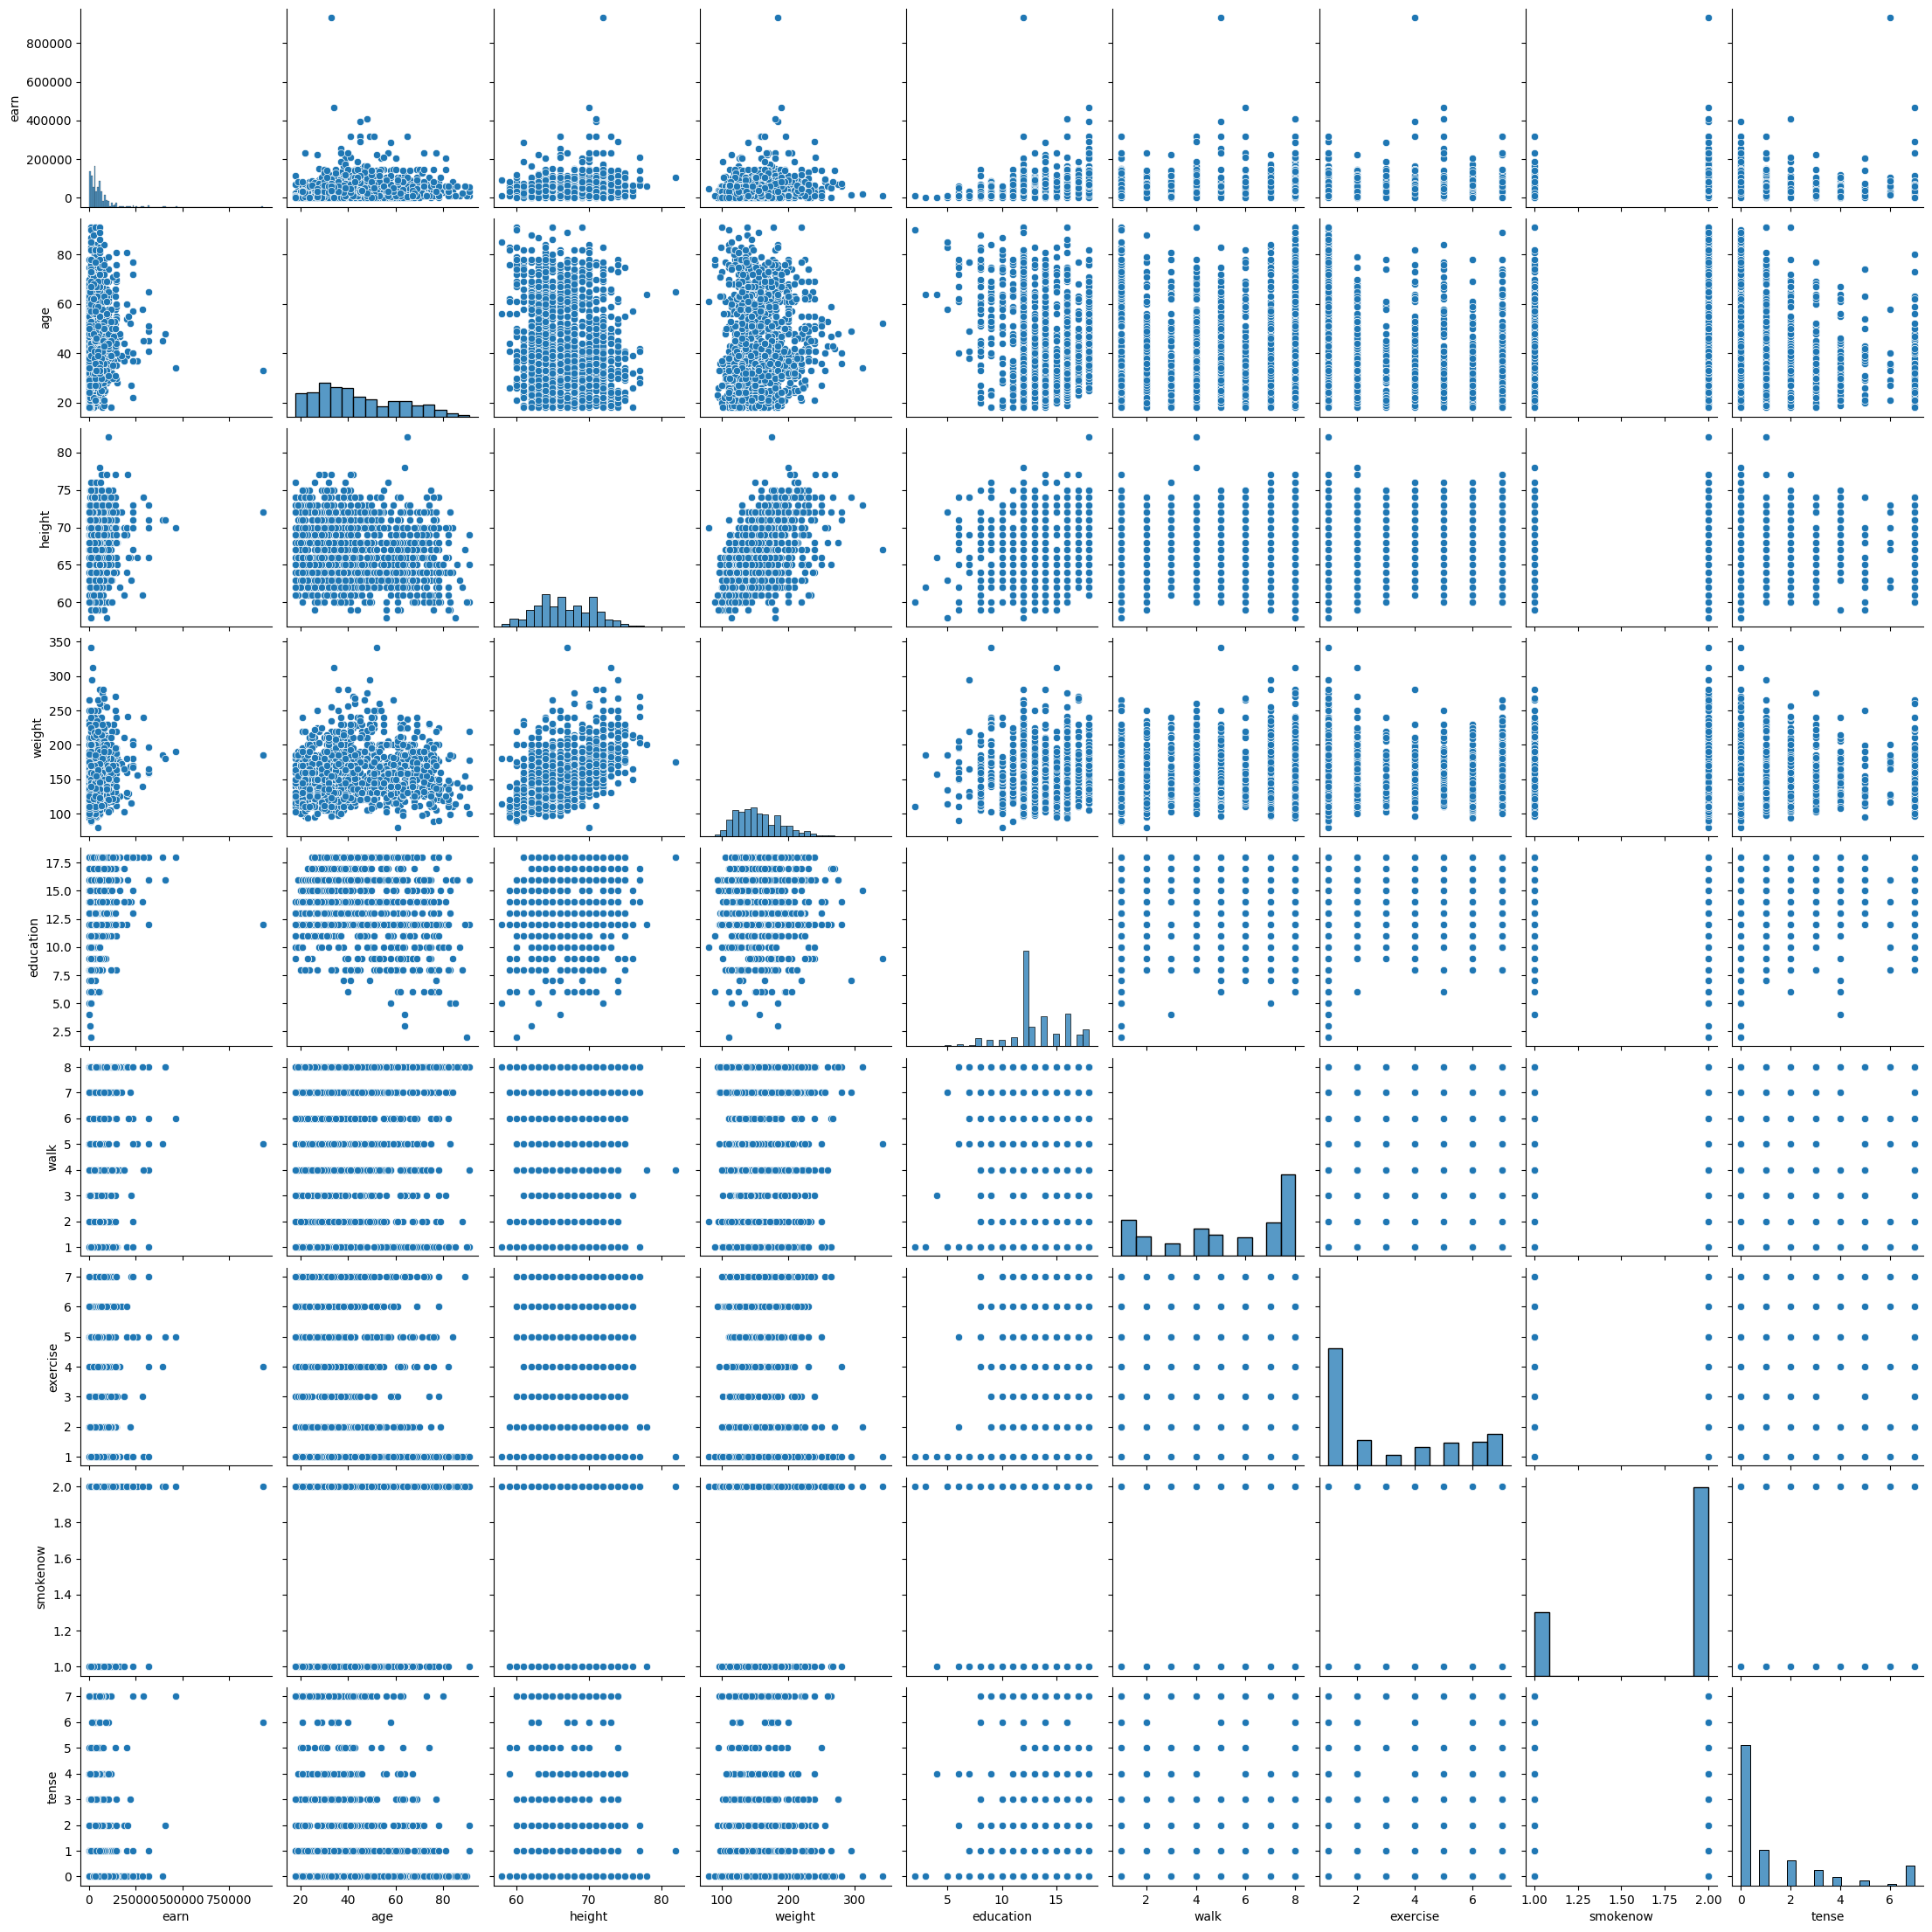

In [16]:
sns.pairplot(train)

In [18]:
train.select_dtypes('int').corr()

,earn,age,height,weight,education,walk,exercise,smokenow,tense
earn,1.000000,0.060472,0.250444,0.152521,0.313749,0.034150,0.080984,0.039708,-0.041476
age,0.060472,1.000000,-0.133450,0.102973,-0.152405,0.020260,-0.338540,0.078346,-0.256751
height,0.250444,-0.133450,1.000000,0.536751,0.136924,0.060131,0.196302,-0.047978,-0.094288
weight,0.152521,0.102973,0.536751,1.000000,0.014005,0.003015,-0.026924,0.049121,-0.079610
education,0.313749,-0.152405,0.136924,0.014005,1.000000,0.061678,0.173327,0.127476,-0.008053
walk,0.034150,0.020260,0.060131,0.003015,0.061678,1.000000,0.179038,0.061457,-0.045031
exercise,0.080984,-0.338540,0.196302,-0.026924,0.173327,0.179038,1.000000,0.038663,0.006154
smokenow,0.039708,0.078346,-0.047978,0.049121,0.127476,0.061457,0.038663,1.000000,-0.091197
tense,-0.041476,-0.256751,-0.094288,-0.079610,-0.008053,-0.045031,0.006154,-0.091197,1.000000


In [19]:
from statsmodels.formula.api import ols

In [22]:
simple_reg=ols('earn ~ height',data=train)
model=simple_reg.fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     83.52
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           2.49e-19
Time:                        10:10:46   Log-Likelihood:                -15360.
No. Observations:                1250   AIC:                         3.072e+04
Df Residuals:                    1248   BIC:                         3.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.862e+05   2.58e+04     -7.219      0.000   -2.37e+05   -1.36e+05
height      3531.8627    386.473      9.139      0.000    2773.654    4290.072
==============================================================================
Omnibus:                     1436.431   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234476.061
Skew:                           5.501   Prob(JB):                         0.00
Kurtosis:                      69.188   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model.params

Intercept   -186191.277816
height         3531.862731
dtype: float64

In [26]:
model.params.iloc[0],model.params.iloc[1]

(-186191.27781557236, 3531.862730911971)

In [27]:
print(f"earn = {model.params.iloc[0]} + {model.params.iloc[1]} * height")

earn = -186191.27781557236 + 3531.862730911971 * height


In [28]:
model.predict()

array([78698.42700283, 61039.11334827, 43379.79969371, ...,
       50443.52515553, 39847.93696279, 46911.66242462])

In [39]:
(
    train.loc[:,['height','earn']]
    .assign(pred=model.predict(),
            e=train.earn-model.predict(),
            se=(train.earn-model.predict())**2)
    .head()
)

,height,earn,pred,e,se
384,75,7437,78698.427003,-71261.427003,5.078191e+09
621,70,144460,61039.113348,83420.886652,6.959044e+09
1331,65,0,43379.799694,-43379.799694,1.881807e+09
1264,59,34950,22188.623308,12761.376692,1.628527e+08
268,67,53590,50443.525156,3146.474844,9.900304e+06


In [41]:
heights_data=pd.DataFrame({'const':[1,1,1,1],
                           'height':[75,76,77,78]})
model.predict(heights_data)

0    78698.427003
1    82230.289734
2    85762.152465
3    89294.015196
dtype: float64

In [42]:
model.predict(heights_data).diff()

0            NaN
1    3531.862731
2    3531.862731
3    3531.862731
dtype: float64

In [43]:
gender_reg=ols('earn ~ gender',data=train)
model_gender=gender_reg.fit()

In [44]:
model_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     124.6
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.19e-27
Time:                        10:55:24   Log-Likelihood:                -15341.
No. Observations:                1250   AIC:                         3.069e+04
Df Residuals:                    1248   BIC:                         3.070e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.643e+04   1854.527     19.642      0.000    3.28e+04    4.01e+04
gender[T.male]  3.373e+04   3021.188     11.164      0.000    2.78e+04    3.97e+04
==============================================================================
Omnibus:                     1453.941   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255035.108
Skew:                           5.596   Prob(JB):                         0.00
Kurtosis:                      72.075   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
print(f"earn = {model_gender.params.iloc[0]} + {model_gender.params.iloc[1]} * height")

earn = 36426.621309371 + 33727.977416743626 * height


In [46]:
(
    train.loc[:,['gender','earn']]
    .assign(pred=model_gender.predict(),
            e=train.earn-model_gender.predict(),
            se=(train.earn-model_gender.predict())**2)
    .head()
)

,gender,earn,pred,e,se
384,male,7437,70154.598726,-62717.598726,3.933497e+09
621,male,144460,70154.598726,74305.401274,5.521293e+09
1331,female,0,36426.621309,-36426.621309,1.326899e+09
1264,female,34950,36426.621309,-1476.621309,2.180410e+06
268,female,53590,36426.621309,17163.378691,2.945816e+08


In [47]:
gender_data=pd.DataFrame({'const':[1,1],
                           'gender':['female','male']})
model_gender.predict(gender_data)

0    36426.621309
1    70154.598726
dtype: float64

In [48]:
ethnicity_reg=ols('earn ~ ethnicity',data=train)
model_ethnicity=ethnicity_reg.fit()

In [49]:
model_ethnicity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.375
Date:                Thu, 16 Oct 2025   Prob (F-statistic):             0.0178
Time:                        11:04:57   Log-Likelihood:                -15395.
No. Observations:                1250   AIC:                         3.080e+04
Df Residuals:                    1246   BIC:                         3.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.046e+04   4918.917      8.226      0.000    3.08e+04    5.01e+04
ethnicity[T.Asian]    -3948.0169   1.31e+04     -0.302      0.762   -2.96e+04    2.17e+04
ethnicity[T.Hispanic] -3885.9413   7856.855     -0.495      0.621   -1.93e+04    1.15e+04
ethnicity[T.White]     1.089e+04   5199.558      2.094      0.036     686.641    2.11e+04
==============================================================================
Omnibus:                     1421.294   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           219279.940
Skew:                           5.418   Prob(JB):                         0.00
Kurtosis:                      66.975   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
multiple_reg=ols('earn ~ weight + gender + weight*gender',data=train)
multiple_model=multiple_reg.fit()

In [57]:
multiple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     44.88
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.53e-27
Time:                        11:19:22   Log-Likelihood:                -15336.
No. Observations:                1250   AIC:                         3.068e+04
Df Residuals:                    1246   BIC:                         3.070e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.751e+04   8845.920      5.371      0.000    3.02e+04    6.49e+04
gender[T.male]        -1.478e+04   1.63e+04     -0.904      0.366   -4.68e+04    1.73e+04
weight                  -76.8149     59.933     -1.282      0.200    -194.395      40.766
weight:gender[T.male]   288.7331     97.295      2.968      0.003      97.853     479.613
==============================================================================
Omnibus:                     1457.188   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           258131.249
Skew:                           5.616   Prob(JB):                         0.00
Kurtosis:                      72.498   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
multiple_reg=ols('earn ~  height + weight + gender + ethnicity + education + walk + exercise + smokenow + tense',data=train)
multiple_model=multiple_reg.fit()

In [60]:
multiple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     25.50
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           4.61e-48
Time:                        11:25:41   Log-Likelihood:                -15273.
No. Observations:                1250   AIC:                         3.057e+04
Df Residuals:                    1238   BIC:                         3.063e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.302e+04   3.46e+04     -1.823      0.069   -1.31e+05    4804.982
gender[T.male]         3.139e+04   4126.393      7.608      0.000    2.33e+04    3.95e+04
ethnicity[T.Asian]    -7900.2873    1.2e+04     -0.660      0.509   -3.14e+04    1.56e+04
ethnicity[T.Hispanic] -4220.6856   7226.382     -0.584      0.559   -1.84e+04    9956.624
ethnicity[T.White]     6015.9403   4780.378      1.258      0.208   -3362.598    1.54e+04
height                  130.4290    553.437      0.236      0.814    -955.350    1216.208
weight                   24.0323     49.269      0.488      0.626     -72.627     120.692
education              6166.2986    559.051     11.030      0.000    5069.507    7263.091
walk                    122.2557    545.764      0.224      0.823    -948.468    1192.980
exercise               -689.1415    646.682     -1.066      0.287   -1957.855     579.572
smokenow               1668.3520   3286.764      0.508      0.612   -4779.892    8116.596
tense                   301.3410    680.182      0.443      0.658   -1033.096    1635.778
==============================================================================
Omnibus:                     1549.090   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           385942.309
Skew:                           6.155   Prob(JB):                         0.00
Kurtosis:                      88.197   Cond. No.                     4.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Scikit-Learn

In [61]:
from sklearn.model_selection import train_test_split

In [64]:
X=data.drop(labels='earn',axis=1)
y=data.earn

In [66]:
y_binned=pd.cut(x=y,bins=[-1,20000,40000,60000,80000,100000,200000,1000000])
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=600,stratify=y_binned)

In [68]:
categorical_features = ['gender','ethnicity','smokenow']

X_train_cleaned = pd.get_dummies(X_train, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X_test_cleaned = pd.get_dummies(X_test, 
                         prefix_sep = '_', 
                         columns = categorical_features, 
                         drop_first = True)

X_test_cleaned.reindex(columns=X_train_cleaned.columns, fill_value=0)   ## Important for consistency in test sample similar to train sample
X_train_cleaned.head()

,age,height,weight,education,walk,exercise,tense,gender_male,ethnicity_Asian,ethnicity_Hispanic,ethnicity_White,smokenow_2
426,53,66,160,15,4,7,0,False,False,False,True,True
1607,26,72,135,12,6,1,0,True,False,False,True,True
1722,65,61,180,14,7,1,2,False,False,False,True,True
281,50,73,225,18,5,2,0,True,False,False,True,True
1695,26,71,150,14,1,1,1,False,False,False,True,False


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model=LinearRegression()

In [71]:
model.fit(X_train_cleaned,y_train)

LinearRegression()

In [73]:
y_pred=model.predict(X_train_cleaned)

In [72]:
pd.DataFrame({"Actual":y_test,'Predicted':model.predict(X_test_cleaned)})

,Actual,Predicted
316,18640,28169.636965
622,25630,23767.170471
847,23300,28142.184868
1463,23300,22305.226953
806,23300,38383.295029
...,...,...
1680,0,47977.874064
44,0,37066.771598
62,74560,65960.963556
587,9320,26933.424409


In [74]:
np.sqrt(np.mean((y_train-y_pred)**2))

48518.9917598682

In [75]:
from sklearn.metrics import root_mean_squared_error

In [76]:
root_mean_squared_error(y_train,y_pred)

48518.9917598682